BONA FIDE AIRLINES 

Introduction

Bona Fide is expanding its horizons to venture into a new business which involves purchasing and operating airplanes for commercial and private enterprises. Therefore the company has no idea of the risks involved in aicraft operation and need research done to provide them with meaningful insights that will help in making the right decisions to purchase the lowest risk aircraft to start up the business. Ths will involve analysis of complex data to uncover patterns and develop insights. Data cleaning and visualization will be applied to come up with predictive models, and communicate the ultimate findings to the business stakeholders.


Data

A dataset provided by the National Transportation Safety Board will be used to derive data for this process. It entails aviation accident data from 1919 to 2023, civil aviation accidents and selected incidents in the US (including the specific regions that accidents occured) and international waters.


1:Importing Pandas

In [183]:
import pandas as pd


2:Loading the Dataset which is a CSV file titled 'Aviation Accident from 1919-2023'. 

Here Pandas will read the files and provide information on the dataset for a better understanding of the data to help in manipulation and data cleaning processes.

In [184]:
df = pd.read_csv('aviation-accident-data-2023-05-16.csv')
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-May-23,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-May-23,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-May-23,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-May-23,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [186]:
df.columns

Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year'],
      dtype='object')

3:Checking for duplicated values in our dataset and omitting them

In [188]:
df.duplicated().value_counts()

False    23852
True       115
dtype: int64

In [189]:
df = df.drop_duplicates()


In [190]:
df.duplicated().value_counts()

False    23852
dtype: int64

4:Dealing with the missing values in the dataset

In [191]:
df.isna().sum()

date               0
type               0
registration    1434
operator           4
fatalities      3833
location         932
country            0
cat                0
year               0
dtype: int64

In [192]:
df.loc[:,'registration'] = df['registration'].fillna('Unknown')


In [193]:
df.loc[:, 'location'] = df['location'].fillna('Unknown')

In [194]:
df.loc[:, 'fatalities'] = df['fatalities'].fillna(0)

In [195]:
df.loc[:, 'operator'] = df['operator'].fillna('Unknown')

In [196]:
df.isna().sum() 

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

5:Converting Data Types

All the data types are 'object' hence it is necessary to convert some columns into different data types in order to have several options when finally working on the visualizations

In [197]:
df.loc[:,'fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')




In [198]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)


In [199]:
categorical_cols = ['type', 'operator', 'country', 'location', 'cat']
df[categorical_cols] = df[categorical_cols].astype('category')


In [200]:
print(df.dtypes)

date              object
type            category
registration      object
operator        category
fatalities       float64
location        category
country         category
cat             category
year               int64
dtype: object


In [201]:
df.isna().sum()

date              0
type              0
registration      0
operator          0
fatalities      353
location          0
country           0
cat               0
year              0
dtype: int64

In [202]:
df.dropna(axis=0, inplace=True)

In [203]:
df.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23438 entries, 61 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   date          23438 non-null  object  
 1   type          23438 non-null  category
 2   registration  23438 non-null  object  
 3   operator      23438 non-null  category
 4   fatalities    23438 non-null  float64 
 5   location      23438 non-null  category
 6   country       23438 non-null  category
 7   cat           23438 non-null  category
 8   year          23438 non-null  int64   
dtypes: category(5), float64(1), int64(1), object(2)
memory usage: 2.2+ MB


6:Creating Data Visualizations

Done with the data cleaning process and now we have data that can be used to create accurate visualizations. We'll
work with data from 1963 to 2023 for the visualizations for more clarity and simplicity in the output of the graphs. 

In [ ]:

df_filtered = df[(df['year'] >= 1963) & (df['year'] <= 2023)]

print(df_filtered)


Import Matplotlib and Seaborn which are the necessary libraries to start working on the visualizations.


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
import warnings
warnings.filterwarnings("ignore")


A line graph illustrating a pattern in which accidents occured between the year 1963 to 2023

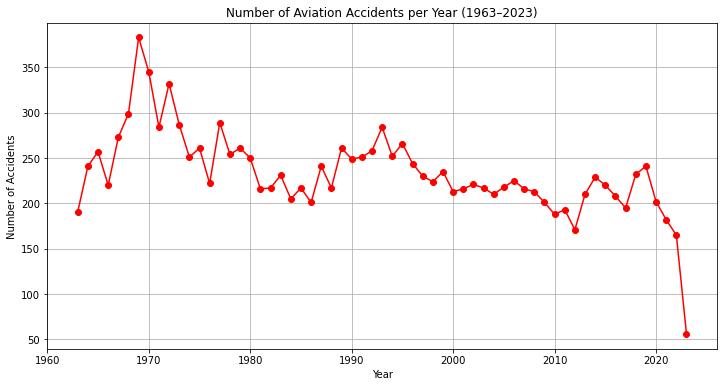

In [217]:

accidents_per_year = df_filtered.groupby('year').size()

plt.figure(figsize=(12,6))
accidents_per_year.plot(kind='line', marker='o', color='r')
plt.title("Number of Aviation Accidents per Year (1963–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()


A bar chart of accidents encountered within five year intervals form 1963-2023

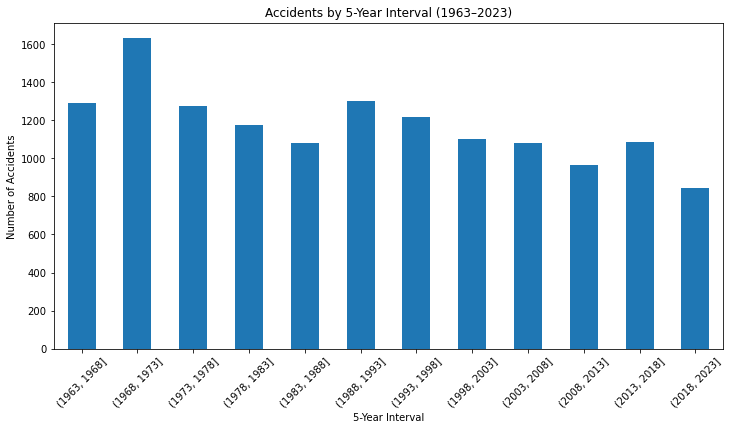

In [209]:
# Create 5-year intervals
df_filtered['year_bin'] = pd.cut(df_filtered['year'],bins=range(1963, 2028, 5))

accidents_per_bin = df_sample.groupby('year_bin').size()

plt.figure(figsize=(12,6))
accidents_per_bin.plot(kind='bar')
plt.title("Accidents by 5-Year Interval (1963–2023)")
plt.xlabel("5-Year Interval")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


A Horizontal Bar Chart of the aicraft types most involved in the accidents

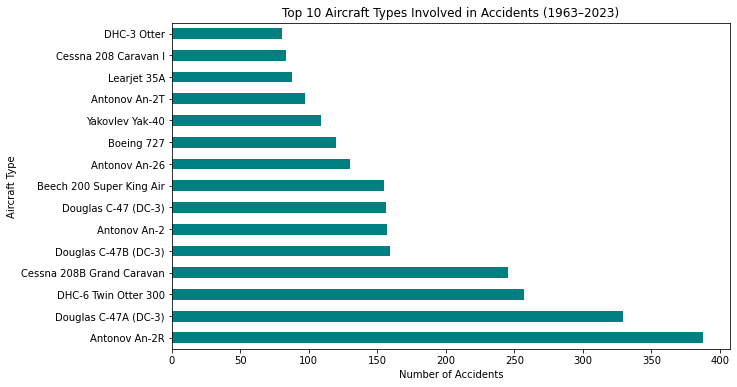

In [220]:
common_types = df_filtered['type'].value_counts().head(15)

plt.figure(figsize=(10,6))
common_types.plot(kind='barh', color='teal')
plt.title("Top 10 Aircraft Types Involved in Accidents (1963–2023)")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Type")
plt.show()


A scatterplot showing the fatalities in the accidents.

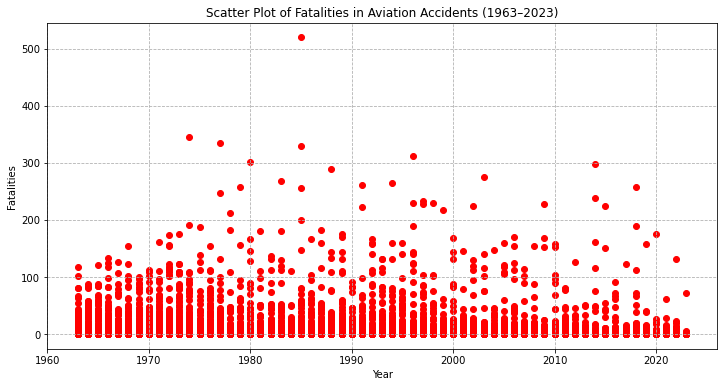

In [211]:

df_filtered['fatalities_num'] = pd.to_numeric(df_filtered['fatalities'], errors='coerce')

plt.figure(figsize=(12,6))
plt.scatter(df_filtered['year'], df_filtered['fatalities_num'], color='red')

plt.title("Scatter Plot of Fatalities in Aviation Accidents (1963–2023)")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.grid(True, linestyle='--')
plt.show()


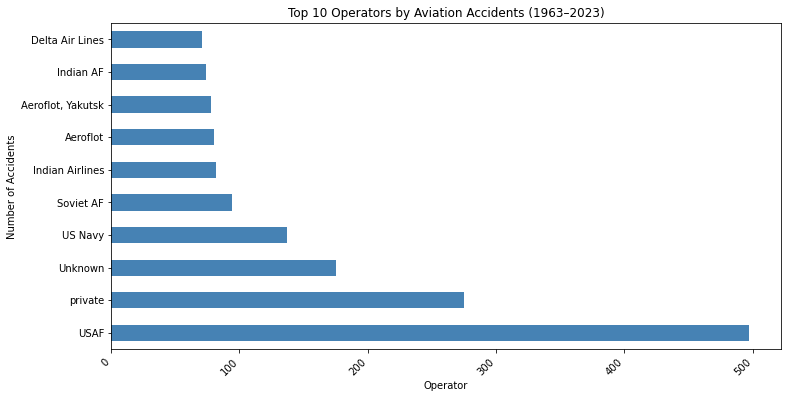

In [212]:
top_operators = df_filtered['operator'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_operators.plot(kind='barh', color='steelblue')
plt.title("Top 10 Operators by Aviation Accidents (1963–2023)")
plt.xlabel("Operator")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.show()


In [218]:
df.to_csv('cleaned_aviation_data.csv', index=False)

In [219]:

df_filtered = df[(df['year'] >= 1963) & (df['year'] <= 2028)].copy()

df_filtered.to_csv('cleaned_aviation_data_1963_2028.csv', index=False)
